# 1. Forecast Foresight

Alexis Perez

Tyler Frazer

Kamil Kosidlak

# 2. Exploratory Data Analysis (EDA)

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [71]:
df = pd.read_csv("data/seattle-weather.csv")
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


# Missing data analysis

In [72]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

# 3. Data Modeling Techniques

# Data Split

Split the dataset into training and testing subsets to evaluate the performance of regression model

In [73]:
X = df.drop(columns=['weather', 'date'])  
y = df['weather']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Selection

Using logistic regression as the most suitable regression model

In [74]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.85


# Decision Tree Analysis

Performing a Decision Tree analysis to identify key predictors

In [75]:
tree = DecisionTreeClassifier().fit(X, y)

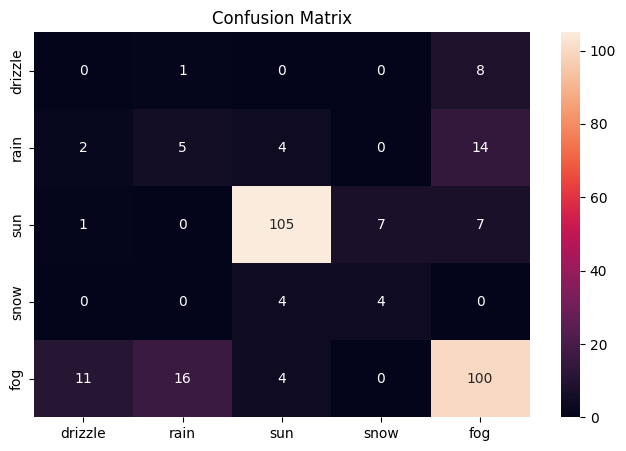

Accuracy: 0.73

Report:
               precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00         9
         fog       0.23      0.20      0.21        25
        rain       0.90      0.88      0.89       120
        snow       0.36      0.50      0.42         8
         sun       0.78      0.76      0.77       131

    accuracy                           0.73       293
   macro avg       0.45      0.47      0.46       293
weighted avg       0.74      0.73      0.74       293



In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train, y_train)
y_pred = tree_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=True,
            xticklabels=df['weather'].unique(), yticklabels=df['weather'].unique())
plt.title('Confusion Matrix')
plt.show()

print(f"Accuracy: {accuracy:.2f}")
print("\nReport:\n", class_report)

# Random Forest Analysis

Performing a Random Forest analysis to identify key predictors

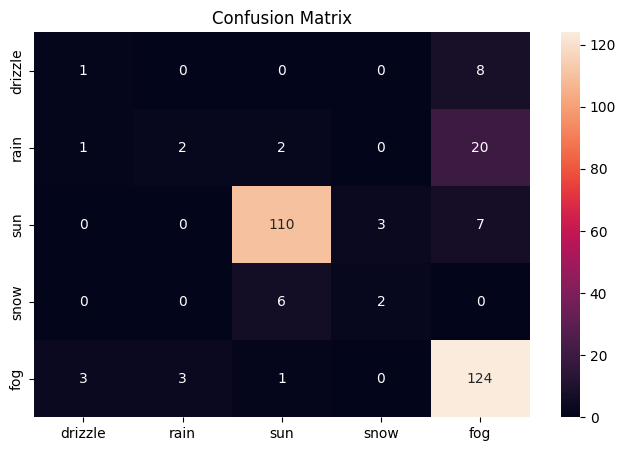

Accuracy: 0.82

Report:
               precision    recall  f1-score   support

     drizzle       0.20      0.11      0.14         9
         fog       0.40      0.08      0.13        25
        rain       0.92      0.92      0.92       120
        snow       0.40      0.25      0.31         8
         sun       0.78      0.95      0.86       131

    accuracy                           0.82       293
   macro avg       0.54      0.46      0.47       293
weighted avg       0.78      0.82      0.78       293



In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=True,
            xticklabels=df['weather'].unique(), yticklabels=df['weather'].unique())
plt.title('Confusion Matrix')
plt.show()

print(f"Accuracy: {accuracy:.2f}")
print("\nReport:\n", class_report)